# Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import os


# Importing dataset

In [4]:
data= pd.read_csv('D:\percentage-and-study-hours-dependency-master/hours.csv')

In [5]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Visualizing Data

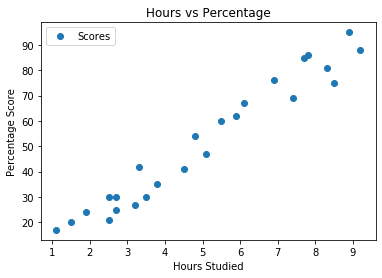

In [6]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

###### OBSERVATION: we can clearly observe that as the number of hours are increasing the percentage score is also increasing.
###### CONCLUSION: Both are positively correlated

##### Dataset for training :  x= Dependent variable , y= independent variable 

In [7]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  


###### checking the dataset and lengths 

In [8]:
X= X.reshape(-1, 1)
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [9]:
y= y.reshape(-1, 1)
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [10]:
print("length of X:" ,len(X))
print("length of y:" ,len(y))

length of X: 25
length of y: 25


##### since we have 25 values each we can use 20 for trainning and 5 for testing 

In [11]:
test_size = 5/25

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=test_size, random_state=0) 
print("split done")

split done


##### Testing the split

In [13]:
print("length of X_train:" ,len(X_train))
print("length of X_test:" ,len(X_test))

length of X_train: 20
length of X_test: 5


##### Building logistic Regression model 

In [14]:
from sklearn.linear_model import LinearRegression  
linear = LinearRegression()  
linear.fit(X_train, y_train) 

print("logistic regression model built.")

logistic regression model built.


##### Predicting the scores

In [15]:

y_pred = linear.predict(X_test)

##### checking your model outputs

In [16]:
print("Hours", "Scores", "pred_Scores")
for i in range(len(X_test)):
    print(X_test[i],y_test[i],y_pred[i])

Hours Scores pred_Scores
[1.5] [20] [16.88414476]
[3.2] [27] [33.73226078]
[7.4] [69] [75.357018]
[2.5] [30] [26.79480124]
[5.9] [62] [60.49103328]


##### Checking MAE   (Better to check MAE than accuracy as we are dealing with very less data)

In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


##### Predicting Percentage for 9.25 hours 

In [18]:
hours = 9.25

model_pred = linear.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(model_pred[0]))

No of Hours = 9.25
Predicted Score = [93.69173249]


In [19]:
linear.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

##### Applying Random forest and Gradient boosting

In [20]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [21]:
GBoost = GradientBoostingRegressor()

###### Fitting Gradient Boost

In [22]:
GBoost.fit(X_train, y_train)

C:\Users\sai12\Anaconda3\New folder\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

##### Predicting for Gradient Boost model

In [23]:
y_pred1 = GBoost.predict(X_test)

##### Summarizing

In [24]:
print("Hours", "Scores", "pred_Scores")
for i in range(len(X_test)):
    print(X_test[i],y_test[i],y_pred1[i])

Hours Scores pred_Scores
[1.5] [20] 17.07191660647004
[3.2] [27] 41.820113735352834
[7.4] [69] 84.98590925291927
[2.5] [30] 21.207107461213862
[5.9] [62] 67.00659744798398


In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1)) 

Mean Absolute Error: 9.506719273714435


In [26]:
rf = RandomForestRegressor()

##### Fitting Random forest model

In [27]:
rf.fit(X_train, y_train)

C:\Users\sai12\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

##### Predicting for Random Forest

In [28]:
y_pred2 = rf.predict(X_test)


In [29]:
print("Hours", "Scores", "pred_Scores")
for i in range(len(X_test)):
    print(X_test[i],y_test[i],y_pred2[i])

Hours Scores pred_Scores
[1.5] [20] 19.705
[3.2] [27] 37.59583333333333
[7.4] [69] 84.06
[2.5] [30] 23.411666666666665
[5.9] [62] 63.03


In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2)) 

Mean Absolute Error: 6.713833333333335


##### Random Forest with Hyper Parameter Tuning 

##### change the cell type to "code" to run

In [31]:
y_pred3 = [28.40875893, 30.7529375 , 27.89338393, 63.35      , 19.8230625 ]

In [32]:
print("Hours", "Scores", "pred_Scores")
for i in range(len(X_test)):
    print(X_test[i],y_test[i],y_pred3[i])

Hours Scores pred_Scores
[1.5] [20] 28.40875893
[3.2] [27] 30.7529375
[7.4] [69] 27.89338393
[2.5] [30] 63.35
[5.9] [62] 19.8230625


In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3)) 

Mean Absolute Error: 25.759050000000002


In [34]:
print('Mean Absolute Error for logistic regression:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Absolute Error for Gradient boosting:', metrics.mean_absolute_error(y_test, y_pred1)) 
print('Mean Absolute Error for Random Forest:', metrics.mean_absolute_error(y_test, y_pred2)) 
print('Mean Absolute Error for Random forest with tuning:', metrics.mean_absolute_error(y_test, y_pred3)) 

Mean Absolute Error for logistic regression: 4.183859899002975
Mean Absolute Error for Gradient boosting: 9.506719273714435
Mean Absolute Error for Random Forest: 6.713833333333335
Mean Absolute Error for Random forest with tuning: 25.759050000000002


##### conclusion: logistic Regression is best (high end models may not be the best models all the time)

## Output of Best model (Logistic Regression)

In [36]:
hours = 9.25

model_pred = linear.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(model_pred[0]))

No of Hours = 9.25
Predicted Score = [93.69173249]


## Output of Other models

In [37]:
hours = 9.25

model_pred1 = GBoost.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score of GBoost = {}".format(model_pred1[0]))

No of Hours = 9.25
Predicted Score of GBoost = 88.06564088936018


In [38]:
hours = 9.25

model_pred2 = rf.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score of Random Forest = {}".format(model_pred2[0]))

No of Hours = 9.25
Predicted Score of Random Forest = 88.21
